In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Job Prep/Niantic/pokemon_data_science_-_pokemon_data_science.csv', index_col=0)
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 1 to 721
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              721 non-null    object 
 1   Type_1            721 non-null    object 
 2   Type_2            350 non-null    object 
 3   Total             721 non-null    int64  
 4   HP                721 non-null    int64  
 5   Attack            721 non-null    int64  
 6   Defense           721 non-null    int64  
 7   Sp_Atk            721 non-null    int64  
 8   Sp_Def            721 non-null    int64  
 9   Speed             721 non-null    int64  
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           644 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  Egg_Group_2       191 non-null    object 
 1

In [4]:
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('PokemonStats', conn, index=False, if_exists='replace')
def run_query(query):
    return pd.read_sql_query(query, conn)

# first 5 rows in the table PokemonStats
query = """
SELECT * FROM PokemonStats LIMIT 5;
"""
run_query(query)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,1,0.875,Monster,Grass,0,0.71,6.9,45,quadruped
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,1,0.875,Monster,Grass,0,0.99,13.0,45,quadruped
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,1,0.875,Monster,Grass,1,2.01,100.0,45,quadruped
3,Charmander,Fire,None,309,39,52,43,60,50,65,...,Red,1,0.875,Monster,Dragon,0,0.61,8.5,45,bipedal_tailed
4,Charmeleon,Fire,None,405,58,64,58,80,65,80,...,Red,1,0.875,Monster,Dragon,0,1.09,19.0,45,bipedal_tailed


### **Question 1**

Suppose this data is a SQL table called ‘PokemonStats’. In an SQL dialect you are most comfortable with, find the top 3 Pokemon in terms of total stats of each type (primary type, Type_1). Your answer should include:

1) the SQL dialect you are using;

2) The SQL query used to answer this question;

3) The returned result.

In [5]:
get_top3 = """
  WITH Type1Rank (name, type, total, rank) AS
    (SELECT ps.name, ps.Type_1, ps.Total,
    RANK() OVER (PARTITION BY ps.Type_1 ORDER BY Total DESC)
    FROM PokemonStats AS ps
    )
  SELECT t1rank.name, t1rank.type, t1rank.total
  FROM Type1Rank AS t1rank
  WHERE t1rank.rank <=3;
"""

run_query(get_top3)

,name,type,total
0,Genesect,Bug,600
1,Volcarona,Bug,550
2,Yanmega,Bug,515
3,Yveltal,Dark,680
4,Darkrai,Dark,600
...,...,...,...
56,Metagross,Steel,600
57,Jirachi,Steel,600
58,Palkia,Water,680
59,Kyogre,Water,670


### **Question 2**

Imagine a new Pokemon game where you are only allowed to collect ONE type of Pokemon. Similar to other Pokemon games, your goal is to have the strongest battlers and defenders for battles and raids. Which type will you pick? Why? Please provide 2-3 supporting statistics/charts.

**Answer:**

I would choose Dragon based on average total, the probability of being lengendary, and the probability of catching it.
- Dragon is top 1 in average total: indicates that it is very powerful in term of Health Points, Attack, Defense, Special Attack, Special
Defense, and Speed
- Dragon is top 2 in becoming a legendary Pokemon among all
- Dragon is the rarest type of Pokemon to catch

<ipython-input-6-2ef57c829398>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=avg_total_by_type.values,


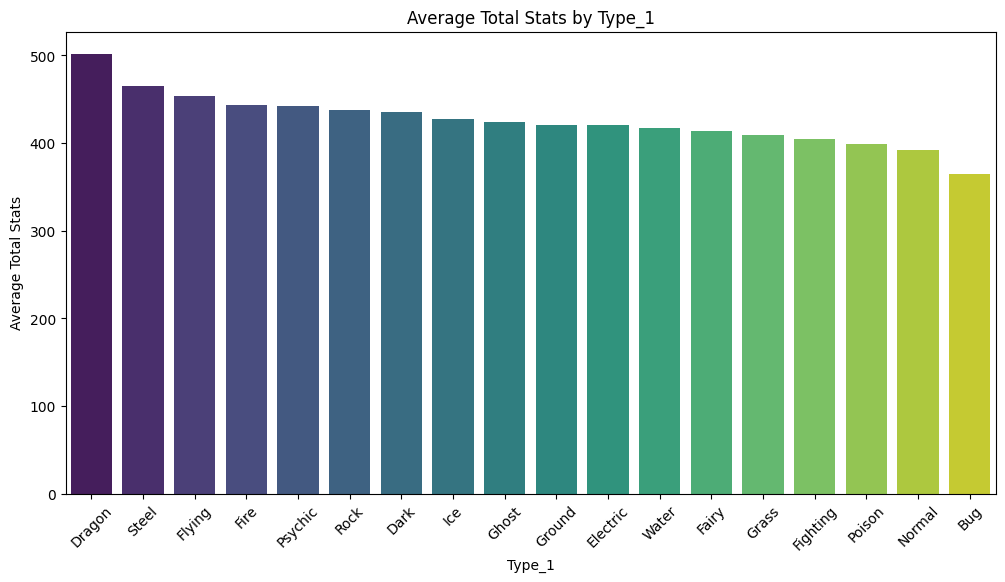

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_total_by_type = df.groupby('Type_1')['Total'].mean().sort_values(ascending=False)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(y=avg_total_by_type.values,
                 x=avg_total_by_type.index,
                 palette='viridis')

plt.xticks(rotation=45)
plt.title('Average Total Stats by Type_1')
plt.xlabel('Type_1')
plt.ylabel('Average Total Stats')
plt.show()


<ipython-input-7-3fe6a3ad34d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legendary_distribution.index, y=legendary_distribution.values, palette='magma')


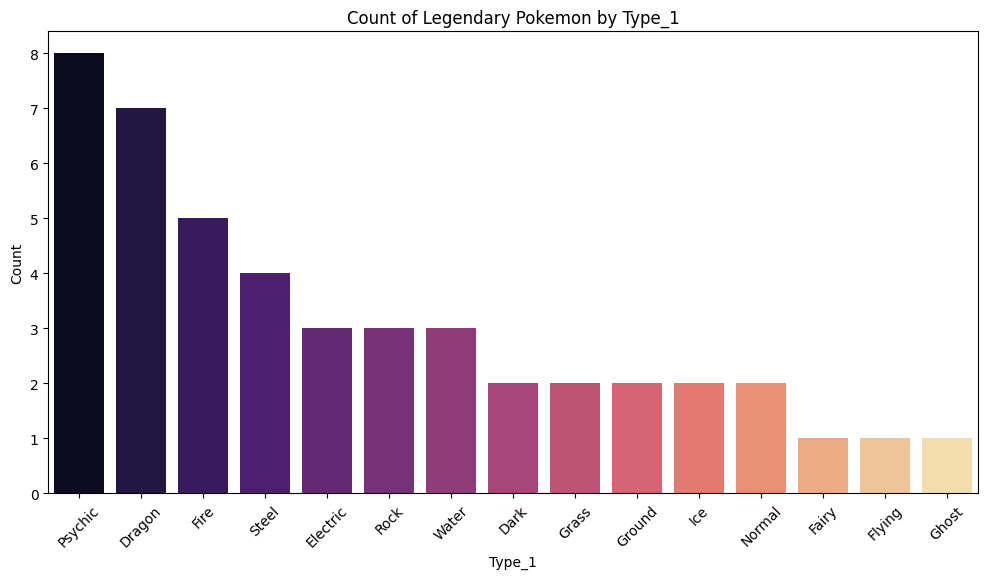

In [7]:
# Count of Legendary Pokémon by type
legendary_distribution = df[df['isLegendary'] == True].groupby('Type_1').size().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=legendary_distribution.index, y=legendary_distribution.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Count of Legendary Pokemon by Type_1')
plt.xlabel('Type_1')
plt.ylabel('Count')
plt.show()


<ipython-input-26-465af6f306f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=avg_catch_rate_by_type.values,


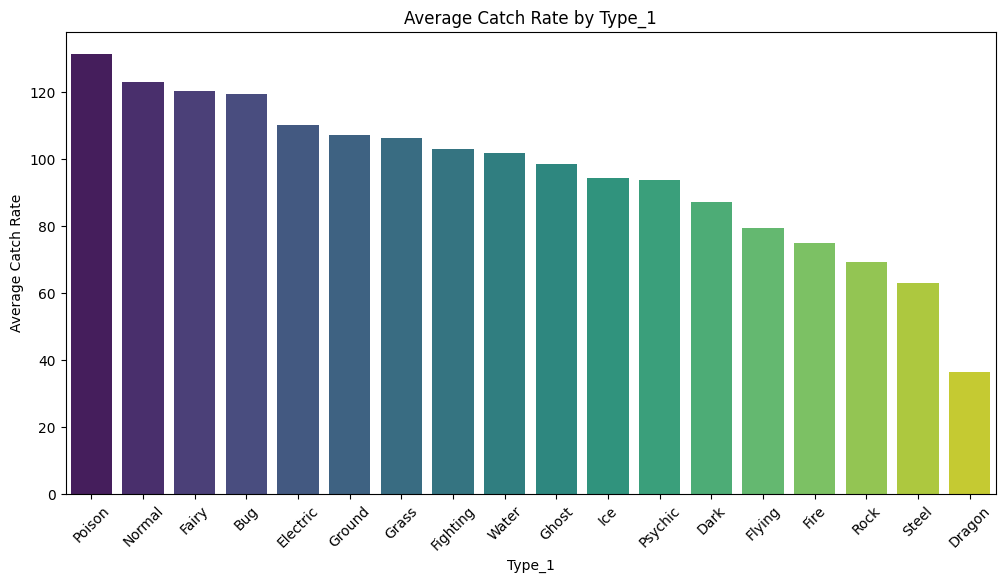

In [26]:
# Probability of Average Catch Rate Pokémon by type
avg_catch_rate_by_type = df.groupby('Type_1')['Catch_Rate'].mean().sort_values(ascending=False)

# Plotting
fig = plt.figure(figsize=(12, 6))
ax = sns.barplot(y=avg_catch_rate_by_type.values,
                 x=avg_catch_rate_by_type.index,
                 palette='viridis')

plt.xticks(rotation=45)
plt.title('Average Catch Rate by Type_1')
plt.xlabel('Type_1')
plt.ylabel('Average Catch Rate')
plt.show()

### **Question 3**

If you want to predict whether the Pokemon is able to Mega-evolve (a.k.a. predict the field
hasMegaEvolution using other fields), which models would you use? List your top 3 models with
pros and cons for each one.

**Answer**

Predicting whether the Pokemon is able to Mega-evolve is a binary classification problem.

**1. Logistic Regression**
- Pros:
  + Interpretability: Logistic regression provides coefficients that can be interpreted to understand the influence of each feature on the probability of Mega Evolution.
  + Simplicity: It's a straightforward model that can serve as a good baseline for binary classification problems.
  + Efficiency: It's computationally efficient, making it suitable for scenarios with a high volume of data and works well if data fit is not perfect.
- Cons:
  + Potential Poor Fit: Logistic regression might not perform well with non-linear relationships unless feature engineering is applied; thus, it might not match the underlying mapping function well.

**2. K-Nearest Neighbors (KNN)**
- Pros:
  + Flexibility: KNN can capture non-linear relationships without any assumptions about the distribution of the data. It is capable of fitting a large number of functional forms.
  + Ease of Use: It's a simple and intuitive model that doesn't require complex hyperparameter tuning (only for the number of neighbors).
- Cons:
  + Curse of Dimensionality: KNN performance might be worse with a high number of features due to the curse of dimensionality.

**3. Random Forest**
- Pros:
  + Versatility: Random Forest can handle both linear and non-linear relationships between features, and and provides feature importance
- Cons:
  + Potential Overfitting: can overfit if not tuned properly
  + Interpretability: Less interpretable than logistic regression

### Question 4

Pick one model and implement it in a language you are most comfortable with (preferably
Python or R). Please do not use the ‘Catch_Rate’ field (if you are Pokemon fan you know why
:)). How well is your model doing and what fields did you end up using?

**Answer:**

In [8]:
df['hasMegaEvolution'].value_counts()

False    675
True      46
Name: hasMegaEvolution, dtype: int64

**RANDOM FOREST**

Choose to implement random Forest due to its balance between performance and interpretability, as well as its robustness to outliers and ability to handle imbalanced datasets.

In [9]:
df_rf = df.drop(columns=["Catch_Rate", "Name"])
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 1 to 721
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type_1            721 non-null    object 
 1   Type_2            350 non-null    object 
 2   Total             721 non-null    int64  
 3   HP                721 non-null    int64  
 4   Attack            721 non-null    int64  
 5   Defense           721 non-null    int64  
 6   Sp_Atk            721 non-null    int64  
 7   Sp_Def            721 non-null    int64  
 8   Speed             721 non-null    int64  
 9   Generation        721 non-null    int64  
 10  isLegendary       721 non-null    bool   
 11  Color             721 non-null    object 
 12  hasGender         721 non-null    bool   
 13  Pr_Male           644 non-null    float64
 14  Egg_Group_1       721 non-null    object 
 15  Egg_Group_2       191 non-null    object 
 16  hasMegaEvolution  721 non-null    bool   
 1

#### Missing Data

In [10]:
print(df_rf.isnull().sum())

Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Body_Style            0
dtype: int64


In [11]:
# Add the 'Has_Type_2' column
df_rf['Has_Type_2'] = df['Type_2'].notnull().astype(int)

# Add the 'Has_Egg_Group_2' column
df_rf['Has_Egg_Group_2'] = df['Egg_Group_2'].notnull().astype(int)

# Replace NaN values in 'Pr_Male' with 0
df_rf['Pr_Male'] = df_rf['Pr_Male'].fillna(0)

# Drop columns Type_2 and Egg_Group_2
df_rf.drop(columns=["Type_2", "Egg_Group_2"], inplace=True)

# Check missing data
print(df_rf.isnull().sum())

Type_1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp_Atk              0
Sp_Def              0
Speed               0
Generation          0
isLegendary         0
Color               0
hasGender           0
Pr_Male             0
Egg_Group_1         0
hasMegaEvolution    0
Height_m            0
Weight_kg           0
Body_Style          0
Has_Type_2          0
Has_Egg_Group_2     0
dtype: int64


#### Data Types

In [12]:
# Boolean type: change to numeric
bool_cols = ['isLegendary', 'hasMegaEvolution', 'hasGender']
df_rf[bool_cols] = df_rf[bool_cols].astype(int)

In [13]:
# Object Type: encode category columns, embedded in preprocessor
# Preprocessor will be used in pipeline when training
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Type_1', 'Color', 'Egg_Group_1', 'Body_Style']

encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_features)],
                                 remainder='passthrough')

In [14]:
# sns.pairplot(df_rf, hue="hasMegaEvolution")
# plt.show()

### Training Random Forest


In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.metrics import accuracy_score

X = df_rf.drop(columns="hasMegaEvolution", axis=1)
y = df_rf['hasMegaEvolution']

# Imbalanced Data (hasMegaEvolution: True << False):
# Use SMOTE to over-sampling hasMegaEvolution with True value
pipeline = make_pipeline_imb(preprocessor,
                             SMOTE(random_state=42),
                             RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
                             )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

(504, 19) (217, 19)


### Cross Validation

CV Accuracy: 89.88% ± 4.02%

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       203
           1       0.44      0.50      0.47        14

    accuracy                           0.93       217
   macro avg       0.70      0.73      0.71       217
weighted avg       0.93      0.93      0.93       217



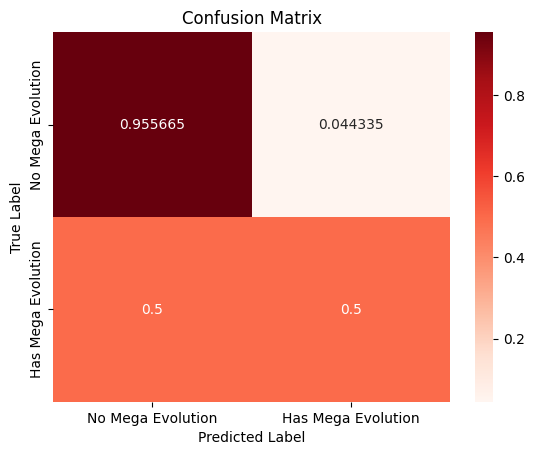

In [16]:
# Evaluating the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'CV Accuracy: {np.mean(cv_scores)*100:.2f}% ± {np.std(cv_scores)*100:.2f}%\n')

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(matrix, cmap="Reds", annot=True, fmt="G",
            xticklabels=["No Mega Evolution", "Has Mega Evolution"],
            yticklabels=["No Mega Evolution", "Has Mega Evolution"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type_1',
                                                                          'Color',
                                                                          'Egg_Group_1',
                                                                          'Body_Style'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(max_depth=5,
                                                               n_estimators=50,
                                                               random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 100}
Best estimator: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Type_1', 'Color',
                                                   'Egg_Group_1',
                                                   'Body_Style'])])),
                ('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])
Best score: -0.061504950495049504


#### Use Parameters from GridSearch

In [19]:
tuned_pipeline = grid_search.best_estimator_
tuned_pipeline.fit(X_train, y_train)
y_pred = tuned_pipeline.predict(X_test)

CV Accuracy: 93.35% ± 1.27%

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       203
           1       0.33      0.21      0.26        14

    accuracy                           0.92       217
   macro avg       0.64      0.59      0.61       217
weighted avg       0.91      0.92      0.91       217



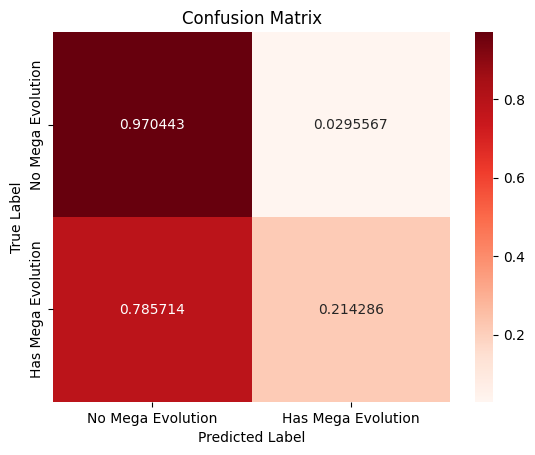

In [20]:
cv_scores = cross_val_score(tuned_pipeline, X, y, cv=5)
print(f'CV Accuracy: {np.mean(cv_scores)*100:.2f}% ± {np.std(cv_scores)*100:.2f}%\n')

print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(matrix, cmap="Reds", annot=True, fmt="G",
            xticklabels=["No Mega Evolution", "Has Mega Evolution"],
            yticklabels=["No Mega Evolution", "Has Mega Evolution"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')
plt.show()

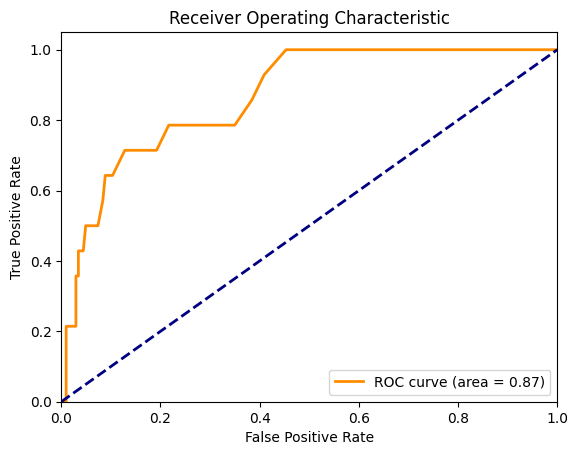

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = tuned_pipeline.predict_proba(X_test)[:, 1]

# Computinf ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Conclusion

Using Random Forest to predict whether the Pokemon is able to Mega-evolve
- Optimal Hyperparameters: max_depth = None, n_estimators = 100 --> Give better accuracy score than baseline model after tuning
- The AUROC value (~0.87) suggests a very good ability of the model to distinguish between the positive and negative classes (no Mega-evolve class and hasMegaEvolution class)

Future Consideration:
- Potential Overfitting: The max_depth being None suggests that the trees in the RandomForestClassifier is allowed to grow without restriction to be optimal for this specific dataset --> This could mean that the data benefits from more complex decision boundaries that deeper trees can provide.
  + However, it's essential to be cautious as it can lead to overfitting, especially in the presence of noise within the data.
- Model Complexity and Training Time: With unrestricted tree depth, the model might be more complex and take longer to train than other models.
- Finetuning other hyperparameters: min_samples_split or min_samples_leaf --> help provide additional control over the growth of the trees and prevent overfitting